In [2]:
# Visuals/Analysis in reddit

import pandas as pd 
 
df = pd.read_csv("reddit_data.csv")

df.head()

User              Date  \
0       FuturologyBot  05/02/2023 16:25   
1            nblack88  05/02/2023 16:23   
2            ISP_SERF  05/02/2023 17:18   
3             rallar8  05/02/2023 16:35   
4  Duckboy_Flaccidpus  05/02/2023 16:47   

                                             Content  Reactions       ID  \
0  The following submission statement was provide...          1  j7bn1af   
1  Part of Sam's job is to be a salesman for his ...      10619  j7bmq60   
2  As his company gets a new round of investments...        862  j7buu2l   
3  He is marketing it as “break capitalism” becau...      10900  j7bohk2   
4  That's what I would say if I wanted win capita...        722  j7bq8hz   

   N_Children                                         Post Title   Subreddit  \
0           0  OpenAI CEO Says His Tech Is Poised to "Break C...  Futurology   
1          96  OpenAI CEO Says His Tech Is Poised to "Break C...  Futurology   
2           6  OpenAI CEO Says His Tech Is Poised to "Break C...  Futurology   
3          84  OpenAI CEO Says His Tech Is Poised to "Break C...  Futurology   
4           3  OpenAI CEO Says His Tech Is Poised to "Break C...  Futurology   

  Platfrom  Location  
0   Reddit       NaN  
1   Reddit       NaN  
2   Reddit       NaN  
3   Reddit       NaN  
4   Reddit       NaN

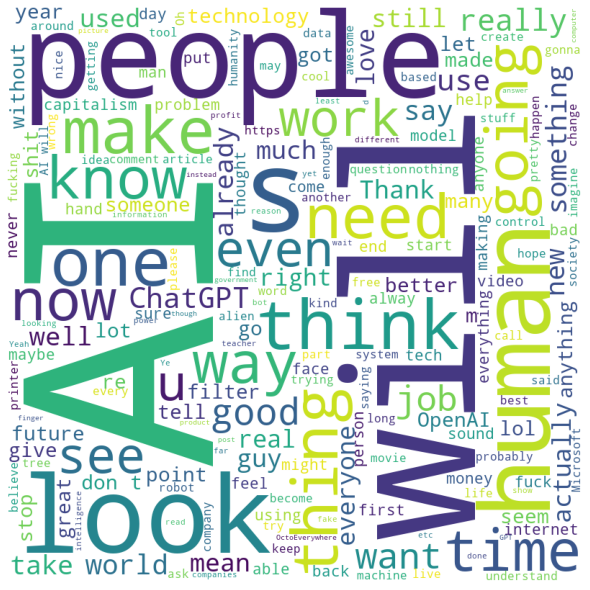

In [7]:
import pandas as pd
from wordcloud import WordCloud

text = ' '.join(df['Content'])
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                      min_font_size=10).generate(text)

# Display the word cloud visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [6]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('reddit_data.csv')

# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

# Loop through the messages and get the sentiment scores for each message
for message in df['Content']:
    scores = sia.polarity_scores(message)
    print(message, scores)

The following submission statement was provided by /u/fungussa:

---

SS: Sam Altman, CEO of OpenAI, claims that his for-profit company will eventually lead to the downfall of capitalism. He is one of the only original cofounders still with the company, and disagrees with fellow cofounder Elon Musk about OpenAI's direction. Altman believes AIs will eventually gain consciousness and the company was founded to prevent the worst outcomes of AGI. He expresses his love for capitalism, but believes AGI will eventually break it.

---

 Please reply to OP's comment here: https://old.reddit.com/r/Futurology/comments/10ufq31/openai_ceo_says_his_tech_is_poised_to_break/j7bir74/ {'neg': 0.043, 'neu': 0.85, 'pos': 0.107, 'compound': 0.6428}
Part of Sam's job is to be a salesman for his company. This includes generating hype. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
As his company gets a new round of investments of 750m US from those same venture capitalists {'neg': 0.0, 'neu': 1.0, 'po

In [10]:
print(scores['compound'])

0.3612


In [9]:
from datetime import datetime

date_string = df['Date']
date_format = "%d/%m/%Y %H:%M"

date_objs = date_string.apply(lambda x: datetime.strptime(x, date_format))
date_strs = date_objs.apply(lambda x: x.strftime("%d/%m/%Y"))

print(date_strs)


0        05/02/2023
1        05/02/2023
2        05/02/2023
3        05/02/2023
4        05/02/2023
            ...    
19315    12/04/2023
19316    13/04/2023
19317    13/04/2023
19318    13/04/2023
19319    15/04/2023
Name: Date, Length: 19320, dtype: object


In [10]:
# Create an empty list to store the compound scores
compound_scores = []

# Loop through the messages and get the sentiment scores for each message
for message in df['Content']:
    scores = sia.polarity_scores(message)
    compound_scores.append(scores['compound'])

# Print the compound scores
print(compound_scores)


# # Add the compound scores as a new column to the dataframe
# df['Compound Score'] = compound_scores

# # Save the updated dataframe to a new CSV file
# df.to_csv('reddit_data', index=False)




[0.6428, 0.0, 0.0, -0.3291, 0.5859, 0.0, 0.7964, 0.4404, 0.0, 0.6249, 0.0334, 0.171, -0.4215, 0.8316, 0.9978, -0.7096, -0.2091, 0.8126, 0.4939, 0.0, 0.6637, 0.5473, 0.3182, 0.5563, 0.5423, 0.0, 0.5574, -0.4549, -0.5517, 0.8765, 0.0, 0.6818, 0.7345, 0.5563, 0.6124, 0.9136, 0.743, -0.6908, 0.34, 0.8934, 0.8708, 0.6461, 0.9599, -0.4773, -0.8271, -0.7003, 0.0, 0.0, -0.8406, 0.0, 0.3182, 0.5783, -0.0387, -0.4767, 0.0772, 0.7096, 0.128, 0.9899, 0.0, -0.4767, 0.4019, 0.0, 0.7506, 0.381, 0.5346, 0.5106, 0.7579, 0.0, 0.34, 0.0, -0.2023, 0.5574, -0.089, 0.6597, 0.0, 0.0, 0.0, -0.8591, -0.2732, 0.5719, -0.743, 0.6997, -0.4606, 0.0, 0.0, 0.0, 0.1763, -0.5574, 0.9881, 0.0, 0.7003, 0.0772, 0.1593, 0.25, 0.296, -0.7482, 0.0, 0.6705, 0.3536, 0.0, -0.7006, 0.25, 0.4404, -0.9538, 0.1531, -0.6696, 0.6353, 0.9291, 0.5777, 0.5823, -0.5075, -0.1027, 0.5574, -0.363, 0.0, 0.4019, 0.428, 0.2846, -0.3612, -0.3412, 0.7783, 0.9468, 0.0, 0.0, 0.0, 0.5267, -0.3612, 0.0772, 0.6956, -0.4019, 0.0, 0.4019, 0.3182, 0.51

In [15]:
# Group the comments by post title
comments_by_post = df.groupby('Post Title')['Content'].apply(list)

# Print the comments for the first post
print(comments_by_post[0])

['This is a garbage article. It just repeats the headline over and over with no real content.', 'You can’t put the genie back in the bottle. Especially when the genie can be open sourced and run on any computer.', 'Rich ppl trying to force the genie back in the bottle is the most transparent indicator of what the power of this new tool will be, unprecedentedly disruptive.  \n\nWhich job is more useful: a welder or a CEO? Which is more replaceable by an outlook script?', 'The biggest problem is getting enough countries and scientists to agree to the pause. Countries like China, Russia, and North Korea would agree publicly and secretly forge full steam ahead to get a jump on the competition.', 'What a poorly written article.', 'What exactly is AI going to do, talk us to death?', "Let's say hypothetically that a pause for AI development is in place (completely unrealistic and impossible to enforce), humanity would never be able to agree on what to do after the pause is in place regardless

In [21]:
# Create an empty dictionary to store the comments by post
comments_dict = {}

# Group the comments by post title
comments_by_post = df.groupby('Post Title')['Content'].apply(list)

# Loop through the groups and add them to the dictionary
for i, (post_title, comments) in enumerate(comments_by_post.items()):
    comments_dict[i+1] = {'Title': post_title, 'Comments': comments}
    
# Print the title and comments for the post
print(comments_dict[2]['Title'])
print(comments_dict[2]['Comments'])

A developer on twitter asked an AI to generate party pictures…
['I cut myself on all these sharp-ass cheekbones.', ' Count the teeth and fingers.', "What do AI and amateur artist have in common?\n\n\n\nThey can't draw hands for shit.", 'Is one of those girls wearing a shirt made out of cheese?', 'I find it more disturbing that all the dudes look the same.\n\nGives real "Gary from fallout" vibes. Lol lol\n\n\nE: All these replies are either hilarious, or eerily relatable. Lol.', "They all look like they're made of wax.", 'There is a hand stickie out of the door with no body attached to it🤣🤣🤣', 'They all look like if there was some post-apocalyptic human subspecies of humans who are strictly dependent on a liquid protein diet that comes out of a toothpaste tube', 'What HBO thinks high schoolers look like', 'Jared Leto in Requiem for A Dream vibes', 'Why all the dudes look stuck in the 1940s/50s in some\n\nSome of the girls look like mannequins', 'Everyone has high cheekbones and weak chi

In [25]:
import numpy as np
# Create a SentimentIntensityAnalyzer instance
sia2 = SentimentIntensityAnalyzer()



# this is doing sentiment on the post title, 
# so our idea was to see if the post in general was positive or negative and then compare that with the overall comments
# Loop through the messages and get the sentiment scores for each message
for message in np.unique(df['Post Title']):
    scores = sia2.polarity_scores(message)
    print(message, scores)

'A Chernobyl for AI' looms if artificial intelligence is kept unchecked, says scientist Stuart Russell {'neg': 0.09, 'neu': 0.734, 'pos': 0.175, 'compound': 0.3612}
A developer on twitter asked an AI to generate party pictures… {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
A reporter uses all his time at the White House press briefing to ask about an assessment that “literally everyone on Earth will die” because of artificial intelligence, gets laughed at {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7269}
AI bots were given freedom in a virtual city. They acted like people {'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.7717}
AI clones teen girl’s voice in $1M kidnapping scam: ‘I’ve got your daughter’ {'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}
AI facial reconstruction of King Henry the 8th of England. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
AI systems like ChatGPT could impact 300 million full-time jobs worldwide, with ad

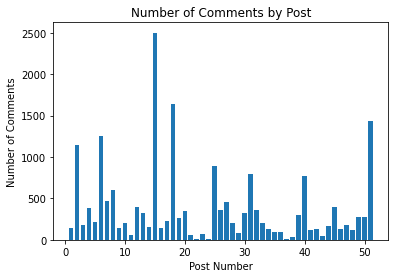

In [26]:
import matplotlib.pyplot as plt

# Get the number of comments for each post
num_comments = [len(comments_dict[i]['Comments']) for i in comments_dict]

# Create a bar chart of the number of comments by post
plt.bar(range(1, len(comments_dict)+1), num_comments)

# Add title and axis labels
plt.title('Number of Comments by Post')
plt.xlabel('Post Number')
plt.ylabel('Number of Comments')

# Show the plot
plt.show()